# Тема: Ожидаемая продолжительность жизни. 

***Ожидаемая продолжительность жизни — это демографический норматив, который показывает, сколько проживёт новорождённый, если уровень смертности сохранится на том же уровне.***

- [x] Задача 1: Найти данные по странам мира и по регионам России
- [ ] Задача 2: Обработка и очистка данных
- [ ] Задача 3: Разведочный анализ данных

In [336]:
import pandas as pd

### Источник №1
[World Bank Group](https://data.worldbank.org/indicator/SP.DYN.LE00.IN)

In [146]:
df = pd.read_csv('data.worldbank.org.csv', skiprows=4)

df = df.dropna(how='all')
display(df.sample(3))
df.drop(['Unnamed: 68'], axis=1, inplace=True) #удаление последнего пустого столбца
print(df.columns)
#Целесообразно убрать столбцы Country Code, Indicator Name и Indicator Code, так как они не несут важной информации в контексте данного исследования

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
127,Kuwait,KWT,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,56.919000,58.015000,59.079000,60.162000,61.158000,62.21900,...,79.562000,79.701000,79.781000,79.722000,79.685000,76.92000,78.673000,80.264000,NaN,NaN
259,World,WLD,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,50.914887,52.871485,55.239243,55.571979,56.064844,55.89198,...,72.047087,72.297906,72.495412,72.735116,72.931034,72.19746,71.280612,71.948717,NaN,NaN
109,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,45.218000,45.398000,45.659000,45.936000,46.184000,44.98000,...,69.636000,70.117000,70.467000,70.710000,70.910000,70.15000,67.240000,67.744000,NaN,NaN


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [163]:
df_ed = df.copy()
df_ed.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_ed = df_ed.rename(columns={'Country Name': 'country'})
display(df_ed.info())#видно, что 2023 год пустой => нужно удалить
df_ed.drop('2023', axis=1, inplace=True)
df_ed #приведенный в машиночитаемый формат датасет с обработанными данными для дальнейшего анализа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  266 non-null    object 
 1   1960     252 non-null    float64
 2   1961     253 non-null    float64
 3   1962     253 non-null    float64
 4   1963     252 non-null    float64
 5   1964     252 non-null    float64
 6   1965     252 non-null    float64
 7   1966     253 non-null    float64
 8   1967     253 non-null    float64
 9   1968     253 non-null    float64
 10  1969     253 non-null    float64
 11  1970     253 non-null    float64
 12  1971     253 non-null    float64
 13  1972     253 non-null    float64
 14  1973     254 non-null    float64
 15  1974     253 non-null    float64
 16  1975     253 non-null    float64
 17  1976     253 non-null    float64
 18  1977     253 non-null    float64
 19  1978     255 non-null    float64
 20  1979     254 non-null    float64
 21  1980     255 non

None

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.50200,66.063000,66.439000,66.757000,...,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000
1,Africa Eastern and Southern,44.098835,44.401083,44.768037,44.925690,45.498933,45.51282,45.263398,45.933042,46.229755,...,60.710028,61.338813,61.856856,62.444641,62.924810,63.367037,63.754752,63.309794,62.449093,62.888463
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.95300,35.453000,35.924000,36.418000,...,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000
3,Africa Western and Central,37.846145,38.165478,38.735788,39.063273,39.333621,39.61488,39.833484,39.466426,40.079451,...,55.615140,55.863665,56.135275,56.518086,56.826634,57.129707,57.500295,57.180671,56.946475,57.589106
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.49500,38.757000,39.092000,39.484000,...,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,61.485000,61.836000,62.134000,62.440000,62.734000,63.04100,63.323000,63.653000,63.935000,...,78.587000,78.880000,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000
262,"Yemen, Rep.",33.678000,34.098000,33.615000,33.247000,34.738000,35.37300,36.097000,36.866000,37.796000,...,67.545000,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000
263,South Africa,52.669000,53.085000,53.376000,53.633000,53.906000,54.19200,54.391000,54.626000,54.876000,...,62.533000,63.380000,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000
264,Zambia,49.042000,49.452000,49.794000,50.133000,49.849000,50.56300,50.679000,50.802000,50.856000,...,59.878000,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000


In [192]:
df_ed.shape

(266, 64)

In [194]:
df_ed.to_csv('world_bank.csv', index=False)

### Источник №2
[fedstat](https://fedstat.ru/indicator/31293)

In [168]:
df1 = pd.read_excel('data (3).xls', skiprows=2)
df1 = df1.rename(columns={
    df1.columns[0]: 'Объекты административно-территориального деления',
    df1.columns[1]: 'Структура населения',
    df1.columns[2]: 'Тип поселения',
    df1.columns[3]: 'Единица измерения'
})  #'Объекты административно-территориального деления', 'Структура населения', 'Тип поселения', 'Единица измерения' - наименования из официальных данных
df1 = df1.drop(0)
display(df1.columns) #Единицу измерения удалим
df1.drop('Единица измерения', axis=1, inplace=True)

Index(['Объекты административно-территориального деления',
       'Структура населения', 'Тип поселения', 'Единица измерения', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [177]:
df1[~df1['2024'].isna()] #Обновленные данные по всей РФ по обоим полам: 72.84
#Это важные данные в контексте данного исследования => оставляем

,Объекты административно-территориального деления,Структура населения,Тип поселения,1990,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
7,Российская Федерация,Оба пола,все население,69.2,68.9,67.8,65,63.9,64.5,65.8,...,71.38,71.87,72.7,72.91,73.34,71.58,70.15,72.73,73.41,72.84


In [189]:
display(df1.info()) #необходимо, чтобы показатели ОПЖ были в формате float64

for year in range(1990, 2025):
    df1[str(year)] = pd.to_numeric(df1[str(year)], errors='coerce') #теперь все данные в нужных форматах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 1 to 972
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Объекты административно-территориального деления  972 non-null    object 
 1   Структура населения                               972 non-null    object 
 2   Тип поселения                                     972 non-null    object 
 3   1990                                              792 non-null    float64
 4   1991                                              792 non-null    float64
 5   1992                                              792 non-null    float64
 6   1993                                              855 non-null    float64
 7   1994                                              855 non-null    float64
 8   1995                                              864 non-null    float64
 9   1996                 

None

In [306]:
#df1 = df1[df1['Структура населения'] == 'Оба пола']
#df1 = df1[df1['Тип поселения'] == 'все население'] #сортировка датасета
#df1 = df1.drop(['Структура населения', 'Тип поселения'], axis=1, inplace=True)

In [316]:
df1 = df1.rename(columns={
    df1.columns[0]: 'regions',
})  
df1['regions'].unique() #необходимо обработать

array(['Российская Федерация', '    Центральный федеральный округ',
       '        Белгородская область', '        Брянская область',
       '        Владимирская область', '        Воронежская область',
       '        Ивановская область', '        Калужская область',
       '        Костромская область', '        Курская область',
       '        Липецкая область', '        Московская область',
       '        Орловская область', '        Рязанская область',
       '        Смоленская область', '        Тамбовская область',
       '        Тверская область', '        Тульская область',
       '        Ярославская область',
       '        Город Москва столица Российской Федерации город федерального значения',
       '    Северо-Западный федеральный округ',
       '        Республика Карелия', '        Республика Коми',
       '        Архангельская область',
       '            Ненецкий автономный округ (Архангельская область)',
       '            Архангельская область (кроме Ненец

In [318]:
df1.to_csv('регионы_россии_ОПЖ.csv', index=False)

### Источник №3
[Росстат](https://rosstat.gov.ru/)

Потребовалась предварительная обработка в Google Sheets для приведения в машиночитаемый формат
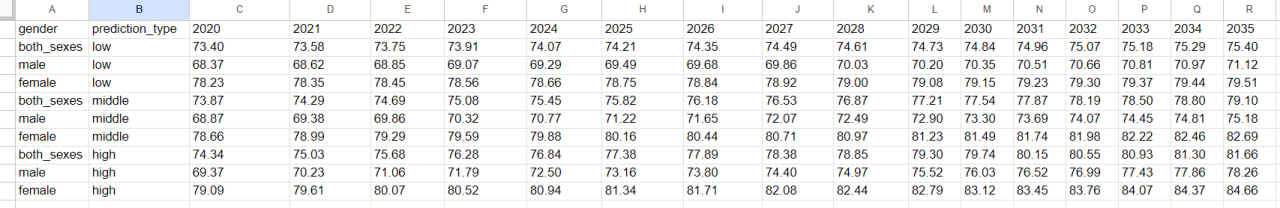

In [120]:
df2 = pd.read_csv('edited_progn7.csv')
df2 

,gender,prediction_type,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,both_sexes,low,73.40,73.58,73.75,73.91,74.07,74.21,74.35,74.49,74.61,74.73,74.84,74.96,75.07,75.18,75.29,75.40
1,male,low,68.37,68.62,68.85,69.07,69.29,69.49,69.68,69.86,70.03,70.20,70.35,70.51,70.66,70.81,70.97,71.12
2,female,low,78.23,78.35,78.45,78.56,78.66,78.75,78.84,78.92,79.00,79.08,79.15,79.23,79.30,79.37,79.44,79.51
3,both_sexes,middle,73.87,74.29,74.69,75.08,75.45,75.82,76.18,76.53,76.87,77.21,77.54,77.87,78.19,78.50,78.80,79.10
4,male,middle,68.87,69.38,69.86,70.32,70.77,71.22,71.65,72.07,72.49,72.90,73.30,73.69,74.07,74.45,74.81,75.18
5,female,middle,78.66,78.99,79.29,79.59,79.88,80.16,80.44,80.71,80.97,81.23,81.49,81.74,81.98,82.22,82.46,82.69
6,both_sexes,high,74.34,75.03,75.68,76.28,76.84,77.38,77.89,78.38,78.85,79.30,79.74,80.15,80.55,80.93,81.30,81.66
7,male,high,69.37,70.23,71.06,71.79,72.50,73.16,73.80,74.40,74.97,75.52,76.03,76.52,76.99,77.43,77.86,78.26
8,female,high,79.09,79.61,80.07,80.52,80.94,81.34,81.71,82.08,82.44,82.79,83.12,83.45,83.76,84.07,84.37,84.66


### Источник №4
[statisticstimes](https://statisticstimes.com/demographics/countries-by-life-expectancy.php)

Воспользовалась Instant Data Scaper для того, чтобы собрать данные 
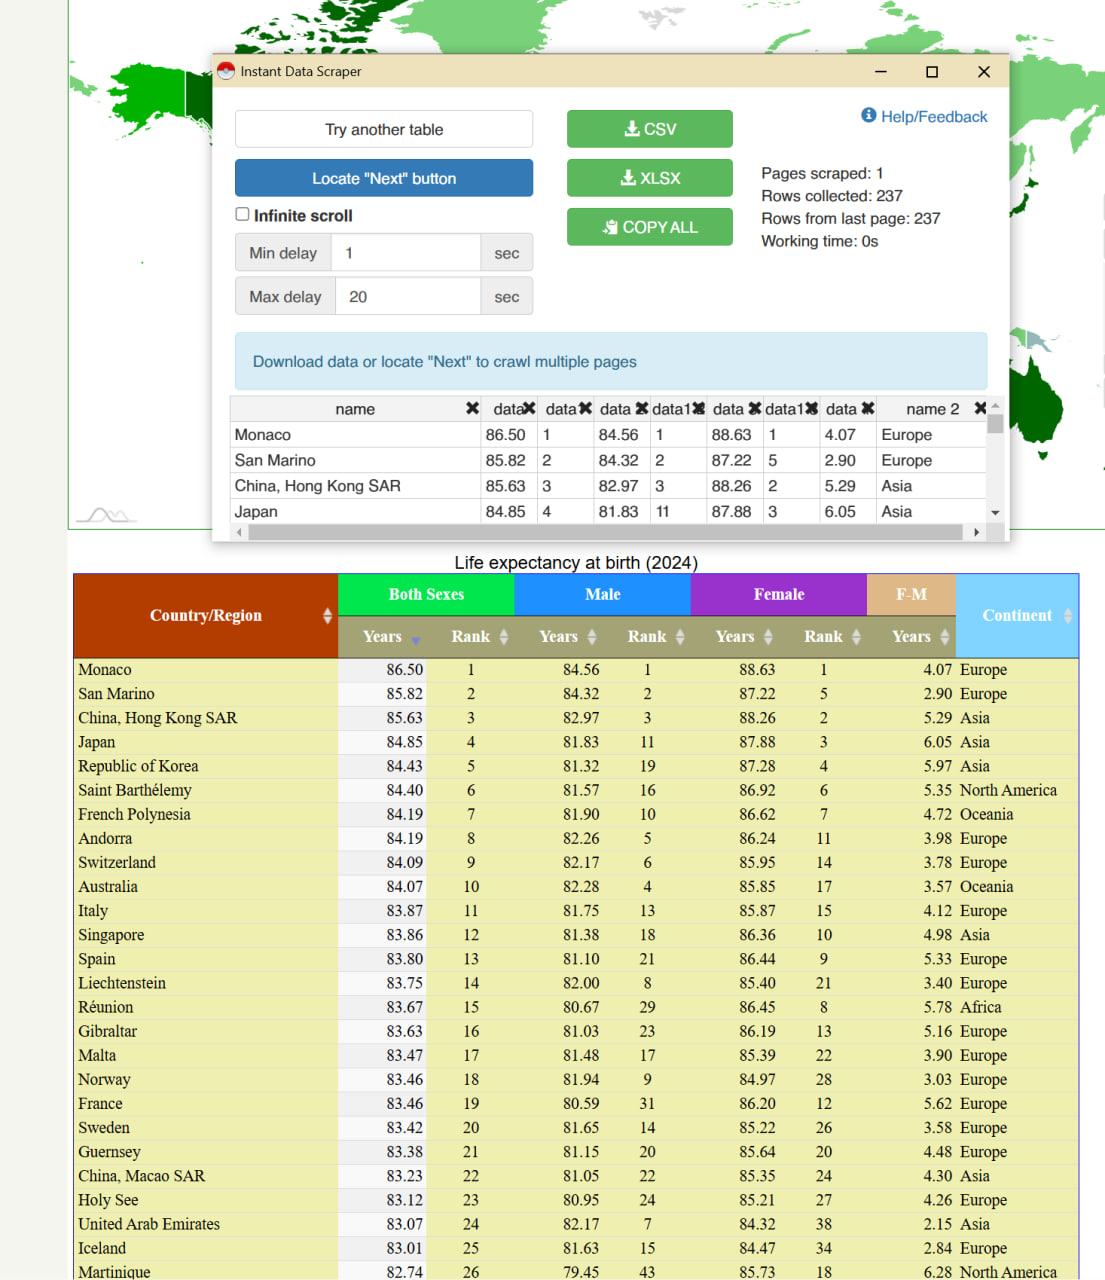

In [107]:
df3 = pd.read_csv('statisticstimes.csv')
df3 = df3.drop(['data1', 'data1 2', 'data1 3', 'data 4'], axis=1) #удаляем побочные показатели
df3 = df3.set_axis(['country', 'both_sexes', 'male', 'female', 'continent'], axis=1) #даем корректные названия столбцам
df3[df3['country'] == 'Russian Federation']

,country,both_sexes,male,female,continent
138,Russian Federation,73.34,67.48,79.19,Europe


In [206]:
df3['country'].to_list()

['Monaco',
 'San Marino',
 'China, Hong Kong SAR',
 'Japan',
 'Republic of Korea',
 'Saint Barthélemy',
 'French Polynesia',
 'Andorra',
 'Switzerland',
 'Australia',
 'Italy',
 'Singapore',
 'Spain',
 'Liechtenstein',
 'Réunion',
 'Gibraltar',
 'Malta',
 'Norway',
 'France',
 'Sweden',
 'Guernsey',
 'China, Macao SAR',
 'Holy See',
 'United Arab Emirates',
 'Iceland',
 'Martinique',
 'Israel',
 'Canada',
 'Ireland',
 'Portugal',
 'Qatar',
 'Bermuda',
 'Luxembourg',
 'Netherlands',
 'Belgium',
 'New Zealand',
 'Guadeloupe',
 'Austria',
 'Denmark',
 'Finland',
 'Greece',
 'Puerto Rico',
 'Cyprus',
 'Slovenia',
 'Germany',
 'United Kingdom',
 'Bahrain',
 'Chile',
 'Maldives',
 'Isle of Man',
 'Costa Rica',
 'China, Taiwan Province of China',
 'Kuwait',
 'Cayman Islands',
 'Saint Martin (French part)',
 'Faroe Islands',
 'Oman',
 'Czechia',
 'Jersey',
 'Albania',
 'Panama',
 'Anguilla',
 'United States of America',
 'Falkland Islands (Malvinas)',
 'Estonia',
 'Saudi Arabia',
 'Northern Ma

In [196]:
df3.to_csv('2024_statistics_world.csv', index=False)

In [218]:
df3

,country,both_sexes,male,female,continent
0,Monaco,86.50,84.56,88.63,Europe
1,San Marino,85.82,84.32,87.22,Europe
2,"China, Hong Kong SAR",85.63,82.97,88.26,Asia
3,Japan,84.85,81.83,87.88,Asia
4,Republic of Korea,84.43,81.32,87.28,Asia
...,...,...,...,...,...
232,Lesotho,57.80,55.03,60.44,Africa
233,South Sudan,57.74,54.76,60.75,Africa
234,Central African Republic,57.67,55.51,59.56,Africa
235,Chad,55.24,53.36,57.19,Africa


In [226]:
df3_ed = df3[['country','continent', 'both_sexes']] #для преобразования

### Сведение таблиц

#### Страны мира

In [239]:
df_merged = pd.merge(df_ed, df3_ed, on="country", how="inner") 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     186 non-null    object 
 1   1960        174 non-null    float64
 2   1961        175 non-null    float64
 3   1962        175 non-null    float64
 4   1963        174 non-null    float64
 5   1964        174 non-null    float64
 6   1965        174 non-null    float64
 7   1966        175 non-null    float64
 8   1967        175 non-null    float64
 9   1968        175 non-null    float64
 10  1969        175 non-null    float64
 11  1970        175 non-null    float64
 12  1971        175 non-null    float64
 13  1972        175 non-null    float64
 14  1973        176 non-null    float64
 15  1974        175 non-null    float64
 16  1975        175 non-null    float64
 17  1976        175 non-null    float64
 18  1977        175 non-null    float64
 19  1978        177 non-null    f

Оказалось, что данных за 2023 практически нет => необходимо найти еще за 2023 год => [database.earth.population](https://database.earth/population/life-expectancy/2023). Здесь также воспользовалась Instant Data Scraper. 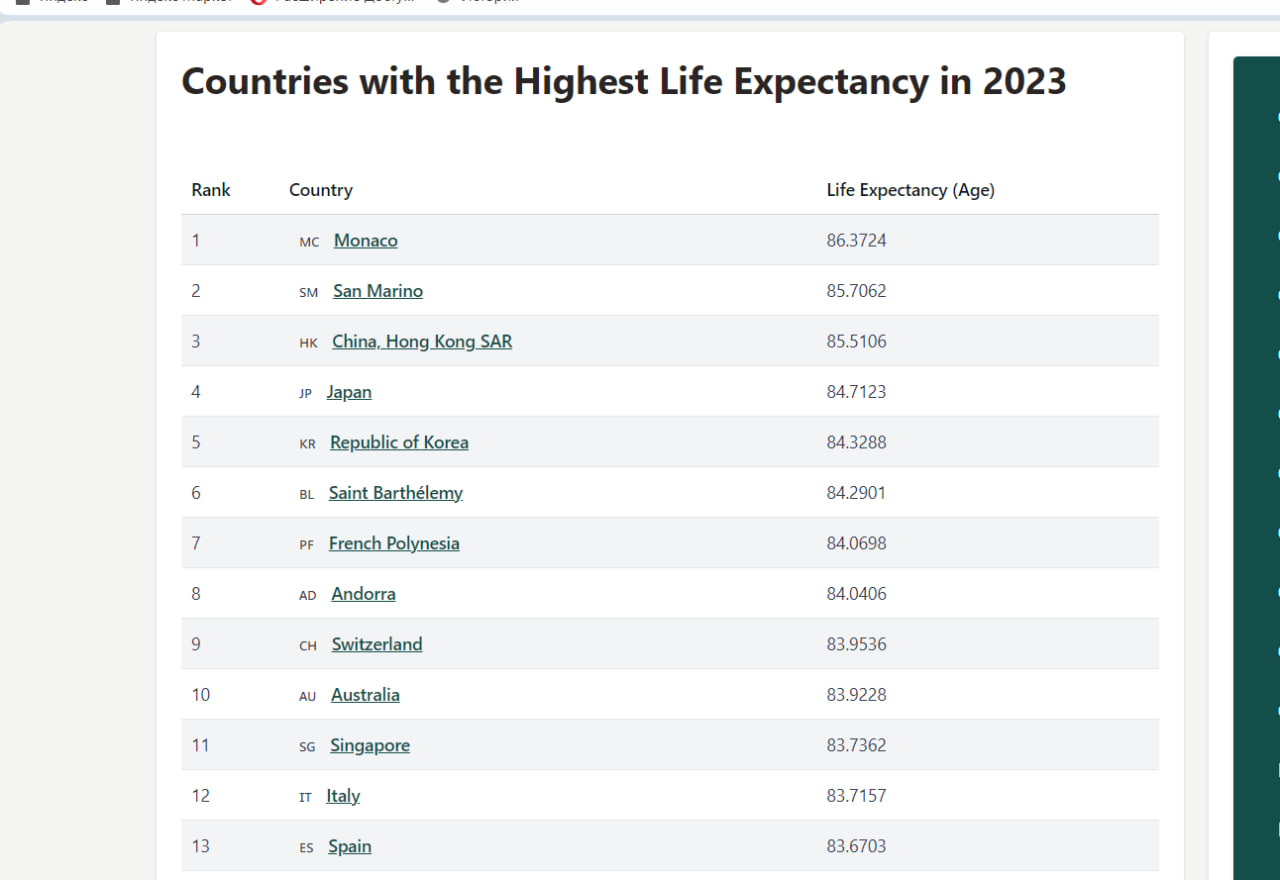

In [247]:
df_2023 = pd.read_csv('database_2023.csv')
df_2023.drop('even:bg-white', axis=1, inplace=True)
df_2023 = df_2023.set_axis(['country', '2023'], axis=1)

In [263]:
df_merged_full = pd.merge(df_merged, df_2023,  on="country", how="inner") 
df_merged_full = df_merged_full.rename(columns={
    'both_sexes': '2024',
})
df_merged_full.columns

Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', 'continent', '2024', '2023'],
      dtype='object')

In [269]:
country_col = ['country']
continent_col = ['continent']
year_cols = sorted([col for col in df_merged_full.columns if col.isdigit()])

# Объединяем в новый порядок
new_order = country_col + continent_col + year_cols

df_merged_full = df_merged_full[new_order]

df_merged_full.columns #объединенный и отсортированный датафрейм по странам с ОПЖ по годам для обоих полов

Index(['country', 'continent', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [271]:
df_merged_full.to_csv('full_dataset_countries.csv', index=False) 

Проверка на повторы в Open Refine
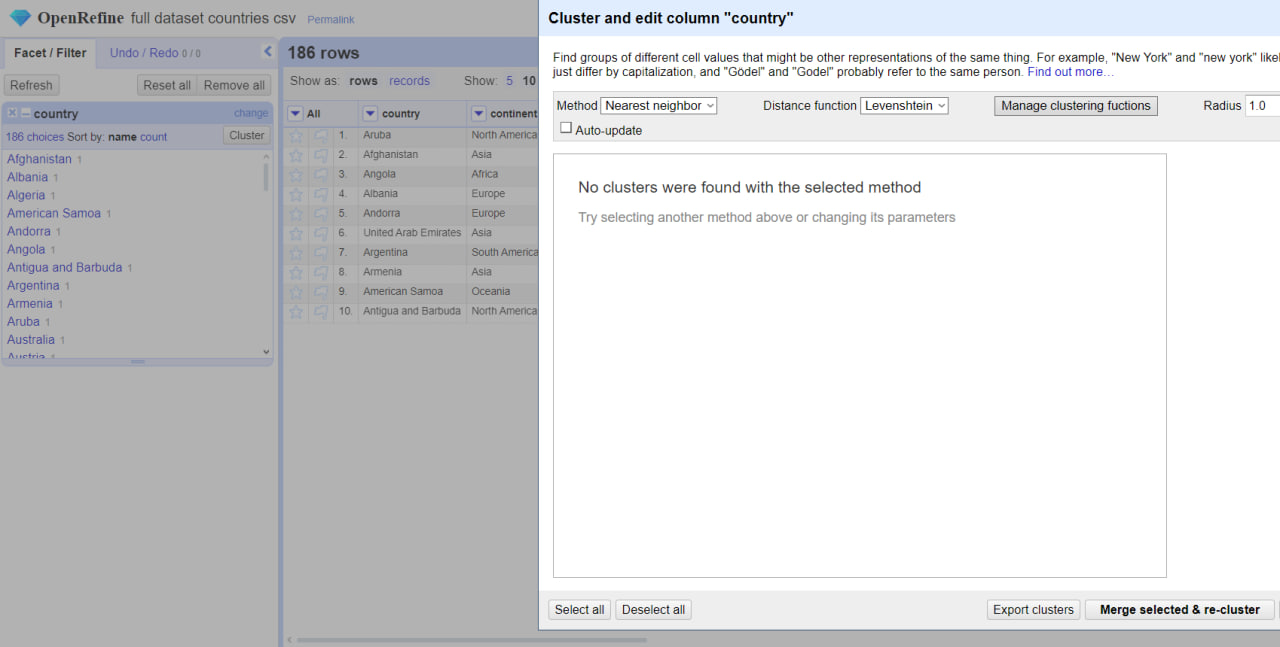

#### По регионам России

In [322]:
regions = pd.read_csv('edited_регионы_россии_ОПЖ.csv') #чистый датафрейм по регионам
regions.sample(5)

,regions,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
57,Пермский край,68.5,68.1,66.6,63.4,61.6,62.7,64.0,65.3,65.9,...,69.06,69.70,70.74,70.67,71.25,69.52,68.45,70.90,70.94,NaN
4,Владимирская область,69.5,69.3,68.1,65.8,64.4,64.9,66.1,66.5,66.6,...,69.88,70.36,71.25,71.35,72.00,70.19,68.31,70.80,71.62,NaN
63,Самарская область,69.7,69.5,68.7,66.3,65.0,65.3,65.9,67.4,67.3,...,70.40,71.13,71.79,72.38,72.84,70.58,69.48,72.14,72.53,NaN
71,Ямало-Ненецкий автономный округ,NaN,NaN,NaN,63.7,63.4,63.5,64.0,65.8,67.2,...,71.61,72.05,73.41,73.98,74.21,71.92,71.78,74.82,75.30,NaN
68,Свердловская область,69.2,68.8,67.2,64.6,62.9,63.8,64.8,66.4,66.5,...,69.82,70.01,71.21,71.27,71.79,70.14,68.79,71.31,71.84,NaN


In [326]:
df2 #чистый датафрейм для дальнейшего сравнительного анализа

,gender,prediction_type,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,both_sexes,low,73.40,73.58,73.75,73.91,74.07,74.21,74.35,74.49,74.61,74.73,74.84,74.96,75.07,75.18,75.29,75.40
1,male,low,68.37,68.62,68.85,69.07,69.29,69.49,69.68,69.86,70.03,70.20,70.35,70.51,70.66,70.81,70.97,71.12
2,female,low,78.23,78.35,78.45,78.56,78.66,78.75,78.84,78.92,79.00,79.08,79.15,79.23,79.30,79.37,79.44,79.51
3,both_sexes,middle,73.87,74.29,74.69,75.08,75.45,75.82,76.18,76.53,76.87,77.21,77.54,77.87,78.19,78.50,78.80,79.10
4,male,middle,68.87,69.38,69.86,70.32,70.77,71.22,71.65,72.07,72.49,72.90,73.30,73.69,74.07,74.45,74.81,75.18
5,female,middle,78.66,78.99,79.29,79.59,79.88,80.16,80.44,80.71,80.97,81.23,81.49,81.74,81.98,82.22,82.46,82.69
6,both_sexes,high,74.34,75.03,75.68,76.28,76.84,77.38,77.89,78.38,78.85,79.30,79.74,80.15,80.55,80.93,81.30,81.66
7,male,high,69.37,70.23,71.06,71.79,72.50,73.16,73.80,74.40,74.97,75.52,76.03,76.52,76.99,77.43,77.86,78.26
8,female,high,79.09,79.61,80.07,80.52,80.94,81.34,81.71,82.08,82.44,82.79,83.12,83.45,83.76,84.07,84.37,84.66


### Разведочный анализ данных

#### По миру

In [342]:
df_merged_full

,country,continent,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,North America,64.152,64.537,64.752,65.132,65.294,65.502,66.063,66.439,...,75.683,75.617,75.903,76.072,76.248,75.723,74.626,74.992,76.3530,76.50
1,Afghanistan,Asia,32.535,33.068,33.547,34.016,34.494,34.953,35.453,35.924,...,62.659,63.136,63.016,63.081,63.565,62.575,61.982,62.879,66.0346,66.29
2,Angola,Africa,38.211,37.267,37.539,37.824,38.131,38.495,38.757,39.092,...,60.655,61.092,61.680,62.144,62.448,62.261,61.643,61.929,64.6170,64.81
3,Albania,Europe,54.439,55.634,56.671,57.844,58.983,60.019,60.998,61.972,...,78.644,78.860,79.047,79.184,79.282,76.989,76.463,76.833,79.6019,79.78
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0406,84.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vanuatu,Oceania,49.630,50.150,50.676,51.228,51.706,52.294,52.862,53.444,...,69.513,69.650,69.710,69.795,69.877,70.299,70.449,70.492,71.4769,71.65
182,Samoa,Oceania,54.688,55.315,55.890,56.460,53.601,57.540,57.922,58.553,...,72.515,72.540,72.590,72.636,72.157,72.768,72.767,72.598,71.6982,71.83
183,South Africa,Africa,52.669,53.085,53.376,53.633,53.906,54.192,54.391,54.626,...,63.950,64.747,65.402,65.674,66.175,65.252,62.341,61.480,66.1387,66.31
184,Zambia,Africa,49.042,49.452,49.794,50.133,49.849,50.563,50.679,50.802,...,61.208,61.794,62.120,62.342,62.793,62.380,61.223,61.803,66.3487,66.53


In [348]:

year_blocks = {
    '1960-1969': range(1960, 1970),
    '1970-1979': range(1970, 1980),
    '1980-1989': range(1980, 1990),
    '1990-1999': range(1990, 2000),
    '2000-2009': range(2000, 2010),
    '2010-2019': range(2010, 2020),
    '2020-2024': range(2020, 2025)
}

df_avg = df_merged_full[['country', 'continent']].copy()


for block, years in year_blocks.items():
    cols = [str(year) for year in years if str(year) in df_merged_full.columns] 
    df_avg[block] = df_merged_full[cols].mean(axis=1, skipna=True)  

df_avg.sample(5)

,country,continent,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,2020-2024
124,Netherlands,Europe,73.544854,74.492146,76.294805,77.374098,79.200000,81.478049,81.768105
82,Israel,Asia,71.656870,72.204000,74.767805,77.479024,80.117317,82.179024,82.597356
71,Guyana,South America,59.448200,60.795400,61.675300,63.211500,65.343300,67.958200,68.129640
100,Latvia,Europe,70.177439,69.399439,69.658268,68.236098,71.407073,74.280488,75.053228
156,Sao Tome and Principe,Africa,49.115900,58.139700,59.755000,61.230500,63.621000,66.895600,68.759640


In [350]:
df_avg[['country', '2020-2024']].sort_values(by='2020-2024', ascending=False).head() #Топ 5 стран по ОПЖ за послендие годы

,country,2020-2024
102,Monaco,86.436200
152,San Marino,85.763100
86,Japan,84.512850
4,Andorra,84.115300
31,Switzerland,83.649696


In [352]:
df_avg[['country', '2020-2024']].sort_values(by='2020-2024', ascending=True).head() #Страны с самыми низкими показателями ОПЖ за последние годы

,country,2020-2024
122,Nigeria,53.65966
165,Chad,53.72164
97,Lesotho,55.19318
29,Central African Republic,55.61074
155,South Sudan,56.27588


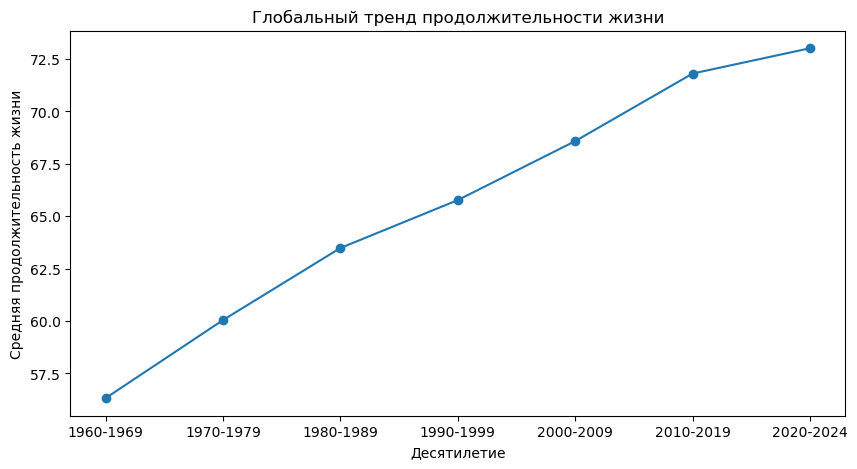

In [354]:
import matplotlib.pyplot as plt

years = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019', '2020-2024']
df_avg[years].mean().plot(kind='line', marker='o', figsize=(10, 5), title="Глобальный тренд продолжительности жизни")
plt.ylabel("Средняя продолжительность жизни")
plt.xlabel("Десятилетие")
plt.show()

Где продолжительность жизни растёт быстрее всего? Топ 10 стран

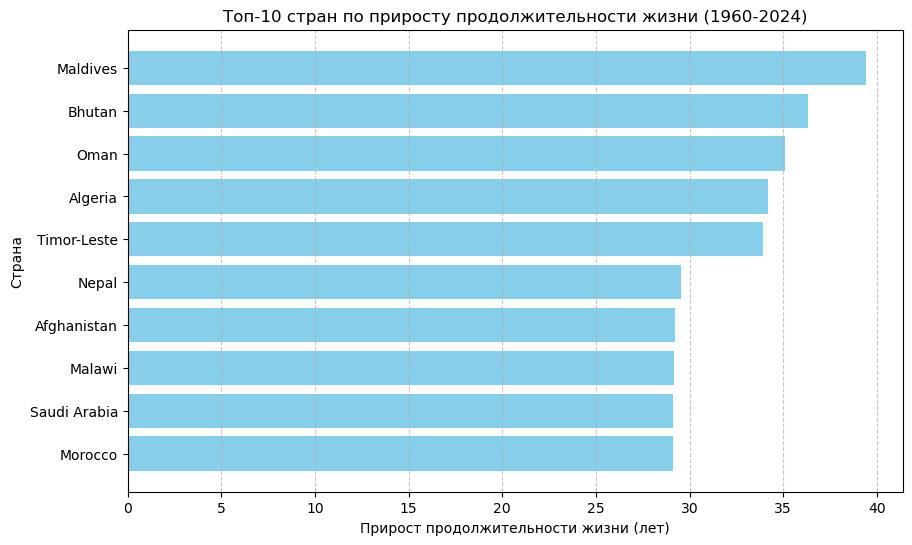

In [367]:

top_growth_countries = df_avg[['country', 'growth']].sort_values(by='growth', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_growth_countries['country'], top_growth_countries['growth'], color='skyblue')
plt.xlabel("Прирост продолжительности жизни (лет)")
plt.ylabel("Страна")
plt.title("Топ-10 стран по приросту продолжительности жизни (1960-2024)")
plt.gca().invert_yaxis()  # Инвертируем ось, чтобы максимальное значение было вверху
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


#### По РФ

In [373]:
regions_mean = regions.iloc[:, 1:].mean()

# Выбираем прогноз среднего сценария (middle) для обоих полов (both_sexes)
df2_middle = df2[(df2['gender'] == 'both_sexes') & (df2['prediction_type'] == 'middle')]
df2_middle = df2_middle.iloc[:, 2:].mean()


# Разница между средним прогнозом и фактическими данными
diff = regions_mean['2020'] - df2_middle['2020']
print(f"Среднее расхождение прогнозов и факта в 2020 году: {diff:.2f} лет")


Среднее расхождение прогнозов и факта в 2020 году: -2.95 лет


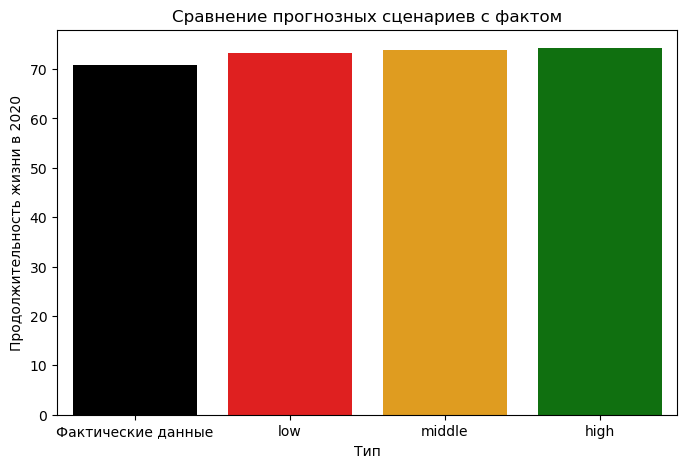

In [381]:
import seaborn as sns

scenarios = ['low', 'middle', 'high']
values = [df2[df2['prediction_type'] == s]['2020'].mean() for s in scenarios]

data = pd.DataFrame({
    'Тип': ['Фактические данные'] + scenarios,
    'Продолжительность жизни в 2020': [regions_mean['2020']] + values
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Тип', y='Продолжительность жизни в 2020', data=data, palette=['black', 'red', 'orange', 'green'])
plt.ylabel("Продолжительность жизни в 2020")
plt.title("Сравнение прогнозных сценариев с фактом")
plt.show()


***Можно заметить, что фактические данные продолжительности жизни расходятся даже с самым низким прогнозом от Росстата.***